In [1]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt

import easyocr

import util

In [2]:
# define constants
model_cfg_path = os.path.join('.', 'model', 'cfg', 'darknet-yolov3.cfg')
model_weights_path = os.path.join('.', 'model', 'weights', 'model.weights')
class_names_path = os.path.join('.','model','class.names')

In [3]:
img_path = 'D:/AFIF/UPNVJ/Semester 4/Praktikum Pengolahan Citra Digital/Tugas/UAS/Project/data/bahan4.jpg'

In [4]:
# load class names
with open(class_names_path, 'r') as f:
    class_names = [j[:-1] for j in f.readlines() if len(j) > 2]
    f.close()

In [5]:
# load model
net = cv2.dnn.readNetFromDarknet(model_cfg_path, model_weights_path)

In [6]:
# load image

img = cv2.imread(img_path)

H, W, _ = img.shape

In [7]:
# convert image
blob = cv2.dnn.blobFromImage(img, 1 / 255, (320, 320), (0, 0, 0), True)

In [9]:
# get detections
net.setInput(blob)


detections = util.get_outputs(net)

In [10]:
# bboxes, class_ids, confidences
bboxes = []
class_ids = []
scores = []

reader = easyocr.Reader(['en'])

for detection in detections:
    # [x1, x2, x3, x4, x5, x6, ..., x85]
    bbox = detection[:4]

    xc, yc, w, h = bbox
    bbox = [int(xc * W), int(yc * H), int(w * W), int(h * H)]

    bbox_confidence = detection[4]

    class_id = np.argmax(detection[5:])
    score = np.amax(detection[5:])

    bboxes.append(bbox)
    class_ids.append(class_id)
    scores.append(score)


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [ ]:
# apply nms
bboxes, class_ids, scores = util.NMS(bboxes, class_ids, scores)

B 2194 42.88171862464554
07.23 82.2596152242319
KKN 98.45814150493852


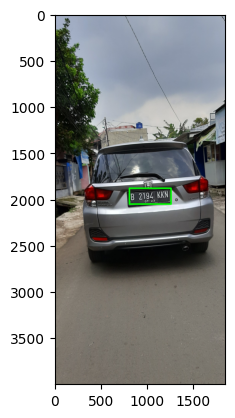

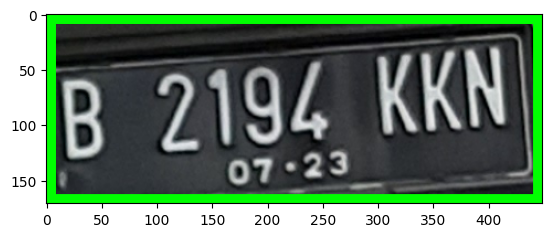

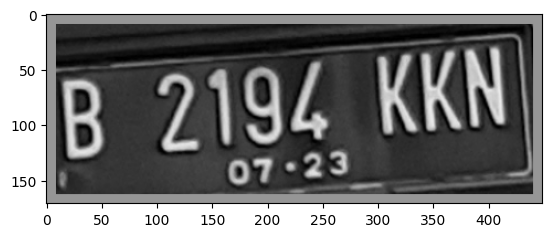

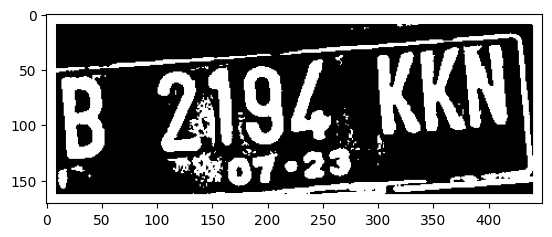

In [14]:
# plot

for bbox_, bbox in enumerate(bboxes):
    xc, yc, w, h = bbox

    license_plate = img[int(yc - (h / 2)):int(yc + (h / 2)), int(xc - (w / 2)):int(xc + (w / 2))]

    img = cv2.rectangle(img,
                        (int(xc - (w / 2)), int(yc - (h / 2))),
                        (int(xc + (w / 2)), int(yc + (h / 2))),
                        (0, 255, 0),
                        15)
    
    license_plate_gray = cv2.cvtColor(license_plate, cv2.COLOR_BGR2GRAY)
    _,license_plate_thresh = cv2.threshold(license_plate_gray,64,255,cv2.THRESH_BINARY)

    output = reader.readtext(license_plate_gray)

    for out in output:
        text_bbox,text,text_score = out
        print(text,text_score *100)

plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.figure()
plt.imshow(cv2.cvtColor(license_plate, cv2.COLOR_BGR2RGB))

plt.figure()
plt.imshow(cv2.cvtColor(license_plate_gray, cv2.COLOR_BGR2RGB))

plt.figure()
plt.imshow(cv2.cvtColor(license_plate_thresh, cv2.COLOR_BGR2RGB))


plt.show()